Prepare the dataset https://www.kaggle.com/drgfreeman/rockpaperscissors

In [0]:
# Import module
import numpy as np
import zipfile, os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from google.colab import files
import matplotlib.image as mpimg
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,CSVLogger,ReduceLROnPlateau
%matplotlib inline

In [0]:
# Extract dataset
zip_file = "/tmp/rockpaperscissors.zip"
read_zip = zipfile.ZipFile(zip_file, 'r')
read_zip.extractall("/tmp")
read_zip.close()

print(os.listdir("/tmp"))  # ls / dir command

['RPS.zip', 'tmp3gwzinn2.py', 'tmp5146lxsv.py', 'rockpaperscissors', '__pycache__', 'tmpuxajrfuv.py', '__MACOSX', 'tmpyt87jkmz.py', 'rockpaperscissors.zip']


In [0]:
# define const
RPS_DIR = "/tmp/rockpaperscissors/rps-cv-images"
IMG_SIZE = 100

In [0]:
# Augmentasi gambar
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest",
    validation_split = 0.2,)


In [0]:
train_gen = datagen.flow_from_directory(
    RPS_DIR,
    target_size = (IMG_SIZE,IMG_SIZE),
    subset = "training")

val_gen = datagen.flow_from_directory(
    RPS_DIR,
    subset = "validation", 
    target_size= (IMG_SIZE,IMG_SIZE),
    shuffle = False)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = Sequential([
                    Conv2D(16, (3,3), activation= "relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)), # Membangun model CNN 
                    MaxPooling2D(2,2),
                    Conv2D(32, (3,3), activation= "relu"),
                    MaxPooling2D(2,2),
                    Conv2D(64, (3,3), activation= "relu"),
                    MaxPooling2D(2,2),
                    Conv2D(128, (3,3), activation= "relu"),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(512, activation = "relu"),
                    Dense(3, activation = "softmax") # Mengeluarkan 3 output (rock, paper, scissors)
])

In [0]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics=['accuracy'])

In [0]:
# Membuat callback
checkpoint = ModelCheckpoint(
    './base.model',
    verbose=2,
    save_best_only=True,
    mode='min',
    period=1)

tensorboard = TensorBoard(
    log_dir = './logs')

csv_logger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False)

reduceLR = ReduceLROnPlateau(
    factor=0.5,
    patience=40,
    verbose=1, 
    cooldown=1, )

callBack = [checkpoint,tensorboard,csv_logger,reduceLR]

In [0]:
model.fit(train_gen, 
          steps_per_epoch= 50, 
          epochs = 10,
          validation_data = val_gen,
          validation_steps=50,
          verbose=2,
          callbacks = callBack) # Epoch pertama biasanya akan menghasilkan akurasi rendah

Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.78139, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
50/50 - 32s - loss: 1.0208 - accuracy: 0.4456 - val_loss: 0.7814 - val_accuracy: 0.6675 - lr: 0.0010
Epoch 2/10

Epoch 00002: val_loss improved from 0.78139 to 0.42983, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
50/50 - 31s - loss: 0.6069 - accuracy: 0.7486 - val_loss: 0.4298 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 3/10

Epoch 00003: val_loss improved from 0.42983 to 0.32932, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
50/50 - 31s - loss: 0.3989 - accuracy: 0.8454 - val_loss: 0.3293 - val_accuracy: 0.8749 - lr: 0.0010
Epoch 4/10

Epoch 00004: val_loss improved from 0.32932 to 0.18173, saving model to ./base.model
INFO:tensorflow:Assets written to: ./base.model/assets
50/50 - 31s - loss: 0.2070 - accuracy: 0.9309 - val_loss: 0.1817 - val_accuracy: 0.9415 - lr:

Saving IMG_20200509_224040.jpg to IMG_20200509_224040 (2).jpg
<class 'dict'>
Paper


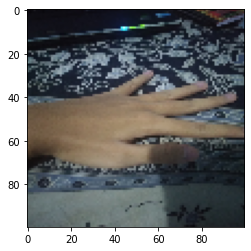

In [0]:
# Import image
img_upl = files.upload()
print(type(img_upl))

# Prediksi gambar
for i in img_upl.keys():
  image = load_img(i,target_size = (IMG_SIZE,IMG_SIZE))
  plt.imshow(image)
  x = img_to_array(image)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  if classes[0][0] == 1:
    print("Paper")
  elif classes[0][1] == 1:
    print("Rock")
  elif classes[0][2] ==1:
    print("Scissors")
  else: 
    print("Can't Recognize")
  